## Project: Data Exploration and NLP Modeling

#### Nicolas BERLIOZ et Loick CUER

### Préparation et Nettoyage des données

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #ces lignes servent à afficher plus de 10 lignes par requète
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) #sert à afficher tout le contenu des colonnes
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/loick/Desktop/TDNLP/Projet2/Scraped_data.csv")
df.head()

,name,types,shop,score,review,review_date,experience_date
0,Claudine,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci",2024-01-11T12:26:55.000Z,18 décembre 2023
1,adeline barbe,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.",2024-01-09T22:36:48.000Z,02 décembre 2023
2,Audrey L.,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.",2024-01-09T20:49:21.000Z,09 janvier 2024
3,Client,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉",2024-01-08T16:31:37.000Z,23 décembre 2023
4,Alex,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !",2024-01-11T17:33:14.000Z,15 décembre 2023


Voici notre dataset obtenu après scraping de plusieurs pages sur le site TrustPilot qui recense des avis utilisateurs sur plusieurs commerces.
Ce dataset se compose d'une ligne par avis scrappé. On y retrouve une colonne "name" qui contient le pseudo de l'auteur de l'avis, une colonne shop qui affiche le nom de la boutique en ligne notée, une colonne "score" qui donne la note décernée par l'utilisateur, une colonne "review" qui contient l'avis, une colonne "review_date" avec la date de publication de l'avis, et enfin une colonne "experience_date" avec la date à laquelle l'utilisateur a profité des services de la boutique en ligne.

In [2]:
df.shape

(38308, 7)

On remarque que la dataset comporte 38239 lignes et 6 colonnes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38308 entries, 0 to 38307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             38308 non-null  object
 1   types            38308 non-null  object
 2   shop             38308 non-null  object
 3   score            38308 non-null  int64 
 4   review           34483 non-null  object
 5   review_date      38308 non-null  object
 6   experience_date  38308 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


### Gestion des valeurs manquantes

On peut apercevoir ci-dessous le nombre de valeur unique pour chaque colonne

In [4]:
df.nunique()

name               30076
types                 64
shop                  79
score                  5
review             34221
review_date        38170
experience_date     3133
dtype: int64

In [5]:
df.isnull().sum()

name                  0
types                 0
shop                  0
score                 0
review             3825
review_date           0
experience_date       0
dtype: int64

On remarque que la colonne review comporte 3825 lignes nulles. On va faire le choix de supprimer les lignes qui n'ont aucune review, car elles n'ont pas d'intérêt particulier pour une approche NLP.

In [6]:
df.dropna(subset=['review'], inplace=True)
df.isnull().sum()

name               0
types              0
shop               0
score              0
review             0
review_date        0
experience_date    0
dtype: int64

On va convertir nos dates en format dates pour pouvoir mieux les manipuler par la suite.

In [7]:

df['review_date'] = pd.to_datetime(df['review_date'])
df.head()

,name,types,shop,score,review,review_date,experience_date
0,Claudine,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci",2024-01-11 12:26:55+00:00,18 décembre 2023
1,adeline barbe,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.",2024-01-09 22:36:48+00:00,02 décembre 2023
2,Audrey L.,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.",2024-01-09 20:49:21+00:00,09 janvier 2024
3,Client,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉",2024-01-08 16:31:37+00:00,23 décembre 2023
4,Alex,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !",2024-01-11 17:33:14+00:00,15 décembre 2023


In [8]:
from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR')
format_date = "%d %B %Y"
df['experience_date'] = df['experience_date'].apply(lambda x: datetime.strptime(x, format_date))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34483 entries, 0 to 38307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   name             34483 non-null  object             
 1   types            34483 non-null  object             
 2   shop             34483 non-null  object             
 3   score            34483 non-null  int64              
 4   review           34483 non-null  object             
 5   review_date      34483 non-null  datetime64[ns, UTC]
 6   experience_date  34483 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
df.head()

,name,types,shop,score,review,review_date,experience_date
0,Claudine,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci",2024-01-11 12:26:55+00:00,2023-12-18
1,adeline barbe,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.",2024-01-09 22:36:48+00:00,2023-12-02
2,Audrey L.,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.",2024-01-09 20:49:21+00:00,2024-01-09
3,Client,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉",2024-01-08 16:31:37+00:00,2023-12-23
4,Alex,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !",2024-01-11 17:33:14+00:00,2023-12-15


Nous allons essayer de déduire le genre de l'auteur grâce à son pseudo. Pour cela on utilise une autre dataset qui contient des noms et le genre qui leur est associé communement. 

In [10]:
df['name'] = df['name'].str.lower()
df['name'] = df['name'].str.split().str[0]
df['name'] = df['name'].str.replace('é', 'e')
df.head()

,name,types,shop,score,review,review_date,experience_date
0,claudine,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci",2024-01-11 12:26:55+00:00,2023-12-18
1,adeline,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.",2024-01-09 22:36:48+00:00,2023-12-02
2,audrey,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.",2024-01-09 20:49:21+00:00,2024-01-09
3,client,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉",2024-01-08 16:31:37+00:00,2023-12-23
4,alex,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !",2024-01-11 17:33:14+00:00,2023-12-15


In [11]:
df_names_gender = pd.read_csv("C:/Users/loick/Desktop/TDNLP/Projet2/data.csv")
df_names_gender['Name'] = df_names_gender['Name'].str.lower()
df_names_gender.isnull().sum()
df_names_gender.dropna(subset=['Gender'], inplace=True)

In [12]:
df_names_gender = df_names_gender.loc[df_names_gender.groupby('Name')['Count'].idxmax()]
df_names_gender_sorted = df_names_gender.sort_values('Count', ascending=False)
df_names_gender_sorted.tail()

,Name,Gender,Count,Probability
130890,skye-leslie,F,1,2.736740e-09
124337,kussi,F,1,2.736740e-09
130889,skye-jade,F,1,2.736740e-09
130888,skye-eleise,F,1,2.736740e-09
123953,kim-maree,F,1,2.736740e-09


In [13]:
df = df.merge(df_names_gender[['Name', 'Gender']], left_on='name', right_on='Name', how='left')
df.rename(columns={'Gender': 'gender'}, inplace=True)
df.drop(columns='Name', inplace=True)
df.head()

,name,types,shop,score,review,review_date,experience_date,gender
0,claudine,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci",2024-01-11 12:26:55+00:00,2023-12-18,F
1,adeline,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.",2024-01-09 22:36:48+00:00,2023-12-02,F
2,audrey,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.",2024-01-09 20:49:21+00:00,2024-01-09,F
3,client,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉",2024-01-08 16:31:37+00:00,2023-12-23,NaN
4,alex,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !",2024-01-11 17:33:14+00:00,2023-12-15,M


On créé une colonne shop_score_mean qui contient la note moyenne du shop en utilisant les avis utilisateurs disponibles dans notre base de donnéed.

In [14]:
df['shop_score_mean'] = df.groupby('shop')['score'].transform('mean')
df.head()

,name,types,shop,score,review,review_date,experience_date,gender,shop_score_mean
0,claudine,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci",2024-01-11 12:26:55+00:00,2023-12-18,F,4.891993
1,adeline,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.",2024-01-09 22:36:48+00:00,2023-12-02,F,4.891993
2,audrey,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.",2024-01-09 20:49:21+00:00,2024-01-09,F,4.891993
3,client,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉",2024-01-08 16:31:37+00:00,2023-12-23,NaN,4.891993
4,alex,"['Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés', 'Magasin de vêtements', 'Magasin de vêtements pour enfants', 'Magasin de laine', 'Magasin de vêtements pour femmes', 'Magasin de vêtements pour bébés']",maisondemamoulia.fr,5,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !",2024-01-11 17:33:14+00:00,2023-12-15,M,4.891993


Enfin, pour manipuler le type de chaque site plus précisemment, nous allons remplacer pour chaque ligne la liste de catégories dans la colonne types par un catégorie plus générale.

In [15]:
df.loc[df['types'].str.contains('cosmétiques', case=True), 'types'] = 'Cosmétique'
df.loc[df['types'].str.contains('vêtements', case=True), 'types'] = 'Vêtements'
df.loc[df['types'].str.contains('Bijouterie', case=True), 'types'] = 'Bijouterie'
df.loc[df['types'].str.contains('électronique', case=True), 'types'] = 'Électronique'
df.loc[df['types'].str.contains('informatique', case=True), 'types'] = 'Informatique'
df.loc[df['types'].str.contains("Service de réparation d'ordinateurs", case=True), 'types'] = "Réparation d'ordinateurs"
df.loc[df['types'].str.contains("logiciel", case=True), 'types'] = "Logiciel"
df.loc[df['types'].str.contains("Service de réparation de matériel électrique", case=True), 'types'] = "Électronique"
df.loc[df['types'].str.contains("télécommunications", case=True), 'types'] = "Télécommunications"
df.loc[df['types'].str.contains("Hi-Fi", case=True), 'types'] = "Électronique"
df.loc[df['types'].str.contains("batteries", case=True), 'types'] = "Électronique"
df.loc[df['types'].str.contains("jumelles", case=True), 'types'] = "Bijouterie"
df.loc[df['types'].str.contains("restauration de photos", case=True), 'types'] = "Informatique" 
df.loc[df['types'].str.contains("immobiliers", case=True), 'types'] = "Immobilier"                               
df_grouped = df.groupby('shop').first()
df_grouped.head()

,name,types,score,review,review_date,experience_date,gender,shop_score_mean
shop,,,,,,,,
aladouchesimone.fr,sophie,Cosmétique,5,"Au top, rien à redire ! Produits de qualité, communication parfaite.",2024-01-10 15:20:25+00:00,2023-12-27,F,4.939791
ams-beauty.com,toure,Cosmétique,5,"c'est la première fois que je me procure des pinceaux d'une tel qualité et en plus avec un document explicatif pour chaque pinceau, je suis novice dans le maquillage mais je sais que grâce a la qualité du matériel et des produits utilisés le rendu sera plus que magnifique .",2024-01-17 12:26:13+00:00,2024-01-02,M,4.672131
aprizo.com,anne,Vêtements,5,"Je recommande vivement ! Le colis est arrivé super vite et les produits sont de bonnes qualités. Exactement comme montrer sur les photos ou en live , franchement n’ayez pas peur vous ne serez pas déçu 🙂",2024-01-18 17:10:44+00:00,2024-01-18,F,4.744949
assistance-ordinateur34.com,niel,Réparation d'ordinateurs,5,Ponctualité et bonne connaissance des produits.,2024-01-08 11:23:06+00:00,2024-01-06,M,4.841808
aurore-luna.fr,maëva,Bijouterie,5,"Petit souci avec le colis avec la poste dans un premier temps, mais le service après vente est top, ma commande m'a été remboursée totalement, j'ai repasser commande qui elle est arrivée rapidement. De plus la bague est magnifique.",2024-01-07 10:48:32+00:00,2023-12-26,F,4.820866


## Data Visulalization

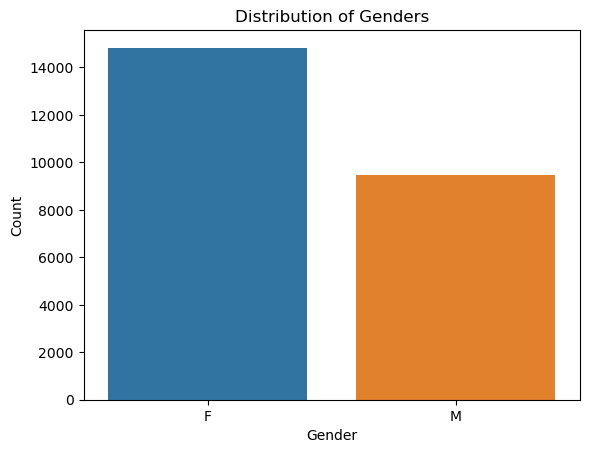

In [16]:
sns.countplot(data=df, x='gender')
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Il y a presque deux fois plus de femmes que d'hommes parmi les utilisateurs qui laissent des avis sur trustpilot.

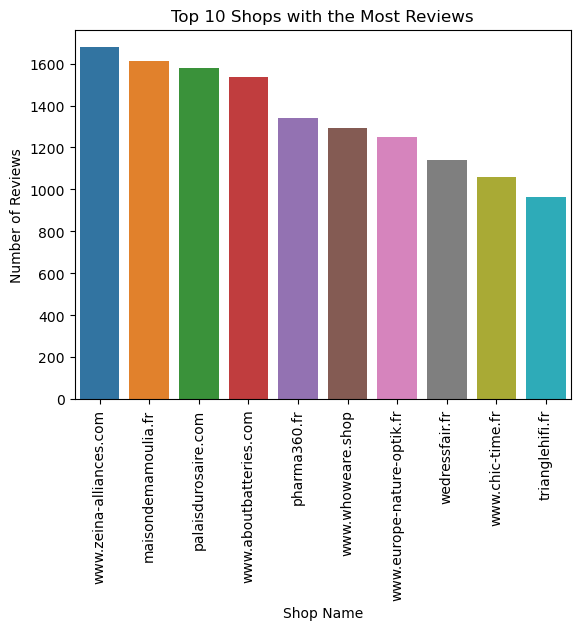

In [17]:
top_10_shops = df['shop'].value_counts().nlargest(10)
sns.barplot(x=top_10_shops.index, y=top_10_shops.values)
plt.title('Top 10 Shops with the Most Reviews')
plt.xlabel('Shop Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34483 entries, 0 to 34482
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   name             34483 non-null  object             
 1   types            34483 non-null  object             
 2   shop             34483 non-null  object             
 3   score            34483 non-null  int64              
 4   review           34483 non-null  object             
 5   review_date      34483 non-null  datetime64[ns, UTC]
 6   experience_date  34483 non-null  datetime64[ns]     
 7   gender           24306 non-null  object             
 8   shop_score_mean  34483 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.6+ MB


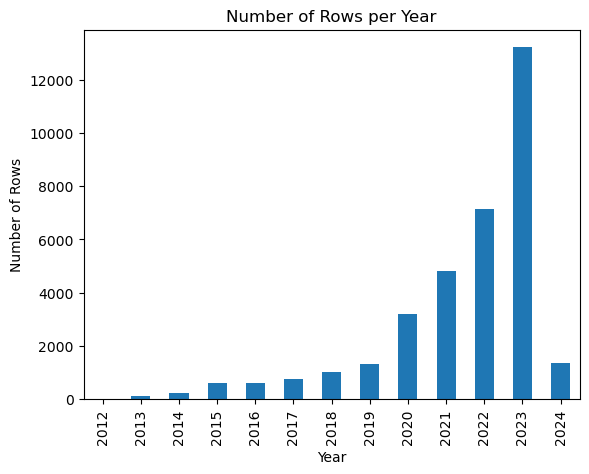

In [19]:
df['year'] = df['review_date'].dt.year
year_counts = df['year'].value_counts().sort_index()

year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Year')
plt.show()


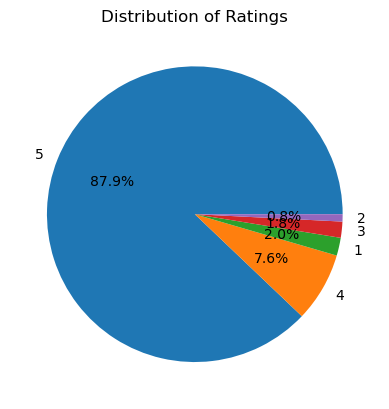

In [20]:
df['score'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.ylabel('')
plt.show()

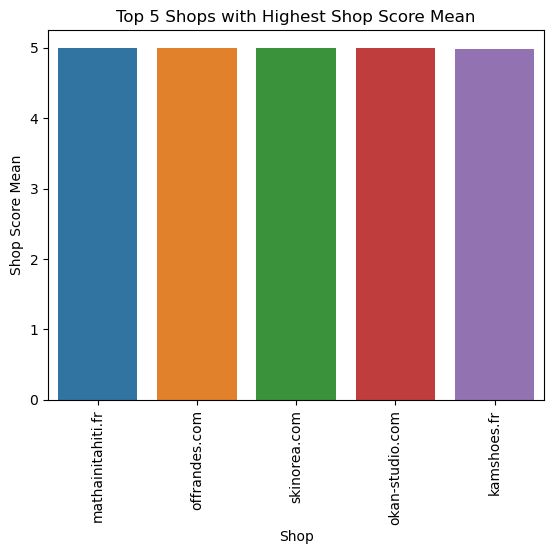

In [21]:
top_5_shops = df.groupby('shop')['shop_score_mean'].mean().nlargest(5)
sns.barplot(x=top_5_shops.index, y=top_5_shops.values)
plt.title('Top 5 Shops with Highest Shop Score Mean')
plt.xlabel('Shop')
plt.ylabel('Shop Score Mean')
plt.xticks(rotation=90)
plt.show()


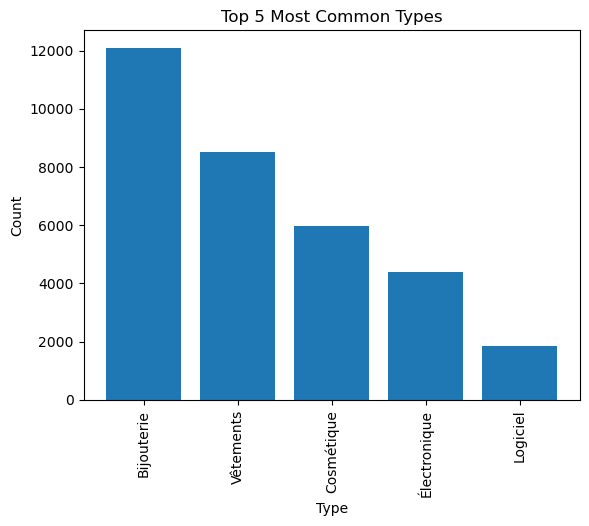

In [22]:
top_5_types = df['types'].value_counts().head(5)

plt.bar(top_5_types.index, top_5_types.values)
plt.title('Top 5 Most Common Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Highlighting frequent words (and n-grams)

Nous allons créer un nuage de mots qui répertorie les groupes de 1, 2 et 3 mots les plus fréquents parmi tous nos avis

Most frequent words :
[('très', 18620), ('rapide', 9585), ('livraison', 7740), ('commande', 6992), ('qualité', 6630), ('bien', 6041), ('recommande', 5458), ('merci', 5446), ('produits', 4887), ('site', 4355)]


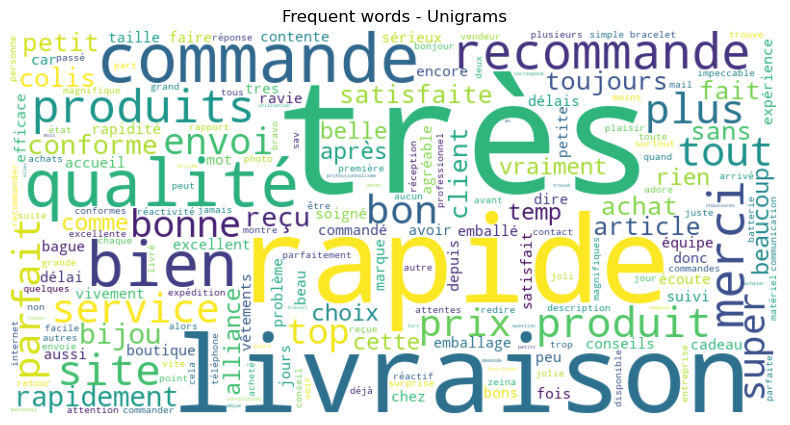

In [23]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer

stopword = stopwords.words('french')
# Fonction pour nettoyer et tokeniser le texte
def preprocess_text(text):
    text = re.sub(r'[^a-zA-ZÀ-ÖØ-öø-ÿ]', ' ', text)
    text = text.lower()
    word_tokens = word_tokenize(text)
    word_tokens_filtered = [word for word in word_tokens if word not in stopword and len(word) > 2]
    lemmatizer = WordNetLemmatizer()
    word_tokens_lemmatized = [lemmatizer.lemmatize(token) for token in word_tokens_filtered]
    return word_tokens_lemmatized


# Applique la fonction précédente aux avis de notre dataset
df['review_tokens'] = df['review'].apply(preprocess_text)

#Calcule la fréquence des mots et créé le nuage de mots
flat_tokens = [token for sublist in df['review_tokens'] for token in sublist]
freq_dist_unigrams = FreqDist(flat_tokens)
print("Most frequent words :")
print(freq_dist_unigrams.most_common(10))
wordcloud_unigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_unigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_unigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent words - Unigrams')
plt.show()


Most frequent words :
[('livraison rapide', 3066), ('très bien', 1894), ('très bon', 1549), ('très rapide', 1490), ('envoi rapide', 1386), ('bonne qualité', 1328), ('très bonne', 1277), ('service client', 1148), ('très satisfaite', 1144), ('recommande vivement', 934)]


Text(0.5, 1.0, 'Frequent words - Trigrams)')

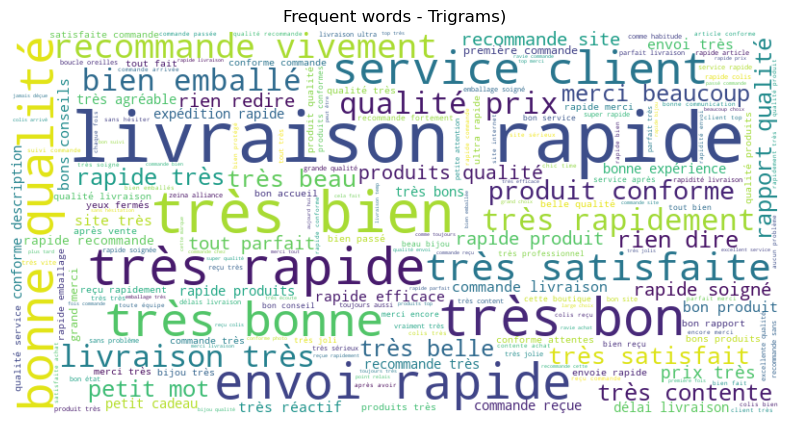

In [24]:
# Génére les bigrams et les convertir en chaînes
bigrams = [' '.join(map(str, gram)) for gram in list(ngrams(flat_tokens, 2))]

#Calcule la fréquence des bigrams et créé le nuage de mots
freq_dist_bigrams = FreqDist(bigrams)
print("Most frequent words :")
print(freq_dist_bigrams.most_common(10))
wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_bigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent words - Trigrams)')


Most frequent Trigrams  :
[('livraison très rapide', 637), ('très bonne qualité', 604), ('rapport qualité prix', 527), ('envoi rapide soigné', 327), ('envoi très rapide', 291), ('bon rapport qualité', 263), ('très bonne expérience', 245), ('très bien emballé', 229), ('service après vente', 225), ('livraison rapide produit', 209)]


Text(0.5, 1.0, 'Frequent words - Trigrams)')

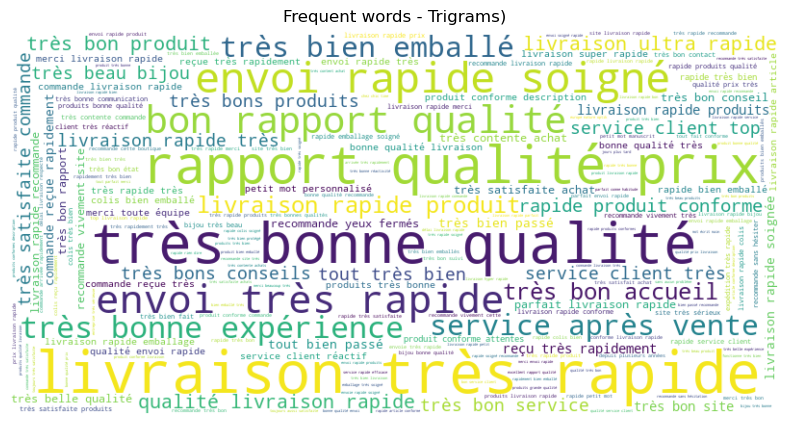

In [25]:
# Générer les trigrams et les convertir en chaînes
trigrams = [' '.join(map(str, gram)) for gram in list(ngrams(flat_tokens, 3))]

#Calcule la fréquence des trigrams et créé le nuage de mots
freq_dist_trigrams = FreqDist(trigrams)
print("\nMost frequent Trigrams  :")
print(freq_dist_trigrams.most_common(10))
wordcloud_trigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_trigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent words - Trigrams)')

## Spelling correction

Nous allons essayer de corriger les erreurs d'orthographe présentes dans les avis des utilisateurs.

Comme les opérations suivantes sont relativement longues à faire, nous allons réduire la taille de notre dataset afin d'accélérer les calculs.
Nous utiliserons le même dataset lors de la modélisation, c'est pourquoi in nous faut le rééquilibrer. nous avons fait le choix de conserver 200 avis de chaque classe, c'est à dire 200 avis avec une note d'1 étoiles, 200 de 2 étoiles, 200 de 3 étoiles ...
Nous avons conservé uniquement 1000 lignes pour que la modélisation et la génération de résumé soit plus rapide.
Nous avons aussi ajouté uniquement des avis de moins de 1000 caractères, car certains avis plus long bloquaient la génération de résumé avec BART.

In [33]:

#Spécifie les caractéristiques de notre dataset échantillon
df['Liked'] = df['score'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
num_rows_per_class = 1600 // df['Liked'].nunique()
max_review_length = 1000

#créé le nouveau dataset échantillon
df_subset = pd.DataFrame()
for score in df['Liked'].unique():
    subset = df[(df['Liked'] == score) & (df['review'].str.len() < max_review_length)].sample(num_rows_per_class, random_state=42)
    df_subset = pd.concat([df_subset, subset])
df_subset = df_subset.sample(frac=1, random_state=42)
df_subset.reset_index(drop=True, inplace=True)
df_subset.head()


,name,types,shop,score,review,review_date,experience_date,gender,shop_score_mean,year,review_tokens,Liked
0,thierry,Bijouterie,www.i-diamants.com,5,"Déjà plus de 8 ans que j'ai fait mon premier achat en ligne sur I-Diamant, M. De Hantsetters et toujours aussi disponible pour les conseils et choix. Des bijoux toujours de qualités, le professionnalisme, la livraison le délai sont de mise.Je vous recommande I-Diamant.",2021-08-05 15:28:32+00:00,2021-08-05,M,4.970650,2021,"[déjà, plus, an, fait, premier, achat, ligne, diamant, hantsetters, toujours, aussi, disponible, conseils, choix, bijou, toujours, qualités, professionnalisme, livraison, délai, mise, recommande, diamant]",1
1,samuel,Cosmétique,blissim.fr,5,"Entreprise sérieuse.Ma première livraison n'est jamais arrivée car on m'a volé des colis dans la boite aux lettres. Sur 3 entreprises concernées seule Blissim a accepté de renvoyer la commande, c'est très appréciable.Je recommande vivement Blissim.Merci encore.",2023-12-07 17:45:33+00:00,2023-12-01,M,4.359375,2023,"[entreprise, sérieuse, première, livraison, jamais, arrivée, car, volé, colis, boite, lettres, entreprises, concernées, seule, blissim, accepté, renvoyer, commande, très, appréciable, recommande, vivement, blissim, merci, encore]",1
2,cla,Bijouterie,illustresbidules.com,5,Très satisfaite de ma commande. Les bracelets sont très beaux et l'envoi très rapide.,2021-03-04 13:00:47+00:00,2021-03-04,NaN,4.949552,2021,"[très, satisfaite, commande, bracelet, très, beau, envoi, très, rapide]",1
3,annie,Cosmétique,olala-cosmetics.com,5,"Très bons produits Belle qualité, efficacité Et super packaging!Merci..et bravo !",2022-09-08 12:16:53+00:00,2022-08-01,F,4.882540,2022,"[très, bons, produits, belle, qualité, efficacité, super, packaging, merci, bravo]",1
4,miognaguiandreagmail.com,Électronique,www.aboutbatteries.com,1,Je n’ai absolument rien reçu,2023-11-13 12:13:47+00:00,2023-10-27,NaN,4.778357,2023,"[absolument, rien, reçu]",0


In [34]:
df_subset['Liked'].unique
df_subset['Liked'].value_counts()


1    800
0    800
Name: Liked, dtype: int64

In [35]:
from spellchecker import SpellChecker
import syntok.segmenter as segmenter

spell_checker = SpellChecker(language='fr')

#fonction qui corrige l'orthographe du texte en entrée.
def correct_spelling(text):
    # Divise le texte en phrases
    sentences = [token.spacing + token.value for paragraph in segmenter.analyze(text) for sentence in paragraph for token in sentence]
    
    # Correction orthographique par phrase
    corrected_sentences = []
    for sentence in sentences:
        corrected_sentence = []
        for word in sentence.split():
            
            corrected_word = spell_checker.correction(word)
                
            if corrected_word is not None:
                corrected_sentence.append(corrected_word)
        
        corrected_sentences.append(''.join(corrected_sentence))
    return ' '.join(corrected_sentences)

correct_spelling("Bonjoure, je suis un étudian")

'bonjour , je suis un étudiant'

In [36]:
# On applique la fonction de correction orthographique au première lignes de notre dataset échantillon
df_subset['reviews_checked'] = df_subset['review'].head(10).apply(correct_spelling)
df_subset[['review', 'reviews_checked']].head(10)

,review,reviews_checked
0,"Déjà plus de 8 ans que j'ai fait mon premier achat en ligne sur I-Diamant, M. De Hantsetters et toujours aussi disponible pour les conseils et choix. Des bijoux toujours de qualités, le professionnalisme, la livraison le délai sont de mise.Je vous recommande I-Diamant.","Déjà plus de 8 ans que je ai fait mon premier achat en ligne sur a diamant , a . De et toujours aussi disponible pour les conseils et choix . Des bijoux toujours de qualités , le professionnalisme , la livraison le délai sont de mise . Je vous recommande a diamant ."
1,"Entreprise sérieuse.Ma première livraison n'est jamais arrivée car on m'a volé des colis dans la boite aux lettres. Sur 3 entreprises concernées seule Blissim a accepté de renvoyer la commande, c'est très appréciable.Je recommande vivement Blissim.Merci encore.","Entreprise sérieuse . Ma première livraison un est jamais arrivée car on a la volé des colis dans la boite aux lettres . Sur 3 entreprises concernées seule a accepté de renvoyer la commande , a est très appréciable . Je recommande vivement . Merci encore ."
2,Très satisfaite de ma commande. Les bracelets sont très beaux et l'envoi très rapide.,Très satisfaite de ma commande . Les bracelets sont très beaux et l renvoi très rapide .
3,"Très bons produits Belle qualité, efficacité Et super packaging!Merci..et bravo !","Très bons produits Belle qualité , efficacité Et super ! bravo !"
4,Je n’ai absolument rien reçu,Je un ai absolument rien reçu
5,BonjourJ’ai passé commande d’une montre Armani le 11/11/17. Je n’ai à ce jour aucune information sur l’avancée de la livraison. Je n’ai toujours rien reçu ! Le délai de 7 à 10jours est passé il y a bien longtemps ! Par contre le prélèvement est immédiat...Aurais-je un jour mon colis ??,Bonjour je ai passé commande de une montre armant le . Je un ai à ce jour aucune information sur l avancée de la livraison . Je un ai toujours rien reçu ! Le délai de 7 à jours est passé il y a bien longtemps ! Par contre le prélèvement est immédiat ac. Aurais je un jour mon colis de
6,"Maintenant, j'ai reçu le remboursement de mes lunettes après avoir réclamé de l'argent tous les jours pendant un mois, mais je ne comprends pas. J'ai commandé des lunettes de soleil en même temps et des pinces à cheveux Vivienne Westwood mais j'ai annulé la commande et pas de livraison. Mais je n'ai pas reçu le remboursement. Et je leur ai envoyé des e-mails tous les jours, 4 à 5 fois par jour, pendant 3 à 4 jours, mais il n'y a eu aucune réponse. qui répond généralement très rapidement","Maintenant , je ai reçu le remboursement de mes lunettes après avoir réclamé de l argent tous les jours pendant un mois , mais je ne comprends pas . je ai commandé des lunettes de soleil en même temps et des pinces à cheveux vienne mais je ai annulé la commande et pas de livraison . Mais je un ai pas reçu le remboursement . Et je leur ai envoyé des de mais tous les jours , 4 à 5 fois par jour , pendant 3 à 4 jours , mais il un y a eu aucune réponse . qui répond généralement très rapidement"
7,Rien a dire tout était parfait,Rien a dire tout était parfait
8,Commande livrée rapidement. Colis préparé avec soin. Produit conforme.,Commande livrée rapidement . Colis préparé avec soin . Produit conforme .
9,Facilite du site très bon rapport qualité prix .Délai respecté.,Facilite du site très bon rapport qualité prix . Délai respecté .


Ici, le correcteur ne semble pas être très performant, et a même tandance à déformer les avis. Nous n'allons donc pas nous baser sur ces corrections dans la suite de l'étude.

## Resumé

Pour créer un resume de chacun de nos avis, nous utiliserons BART, et plus spécifiquement BARThez qui a l'avantage de mieux traiter le langage français, un transformer régulièrement utilisé pour la génération de résumés. Nos avis étant particulièrement courts, les résumer ne servirait pas à grand chose. Nous allons donc créer un résumé à partir des avis de chaque boutique à partir de notre dataset échantillon. Pour cela nous allons faire une aggrégation sur notre dataset pour obtenir une ligne par shop, concatener tous les avis de ce shop dans ne nouvelle colonne total_review, puis résumer cette longue chaine de caractères.

In [37]:
df_agg = df_subset.copy()
df_agg['total_review'] = df_subset.groupby('shop')['review'].transform(lambda x: ' '.join(x))
df_agg = df_agg.drop_duplicates(subset='shop')

In [38]:
from transformers import pipeline
import torch

from transformers import (AutoTokenizer,AutoModelForSeq2SeqLM)

barthez_tokenizer = AutoTokenizer.from_pretrained("moussaKam/barthez")
barthez_model = AutoModelForSeq2SeqLM.from_pretrained("moussaKam/barthez-orangesum-abstract")

# Utilisez le modèle BARThez pour la sommation
summarizer = pipeline(task="summarization", model=barthez_model, tokenizer=barthez_tokenizer, framework="pt",truncation=True)

# Fonction pour appliquer la sommation et gérer NaN
def summarize_and_handle_nan(text):
    if pd.notna(text):
        return summarizer(text, max_length=150, min_length=20, length_penalty=2, num_beams=4)[0]['summary_text']
    else:
        return ""

df_agg['resume_BARThez'] = df_agg['total_review'].apply(summarize_and_handle_nan)

c:\Users\loick\anaconda3\Lib\site-packages\transformers\generation\configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
Your max_length is set to 150, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 150, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)
Your max_length is set to 150, bu

In [39]:
from transformers import pipeline
summarizer = pipeline(task="summarization",model="facebook/bart-large-cnn",tokenizer="facebook/bart-large-cnn",framework="pt",truncation=True)


# Function to apply summarization and handle NaN
def summarize_and_handle_nan(text):
    if pd.notna(text):
        return summarizer(text, max_length=100, min_length=10, length_penalty=2)[0]['summary_text']
    else:
        return ""


df_agg['resume_BART'] = df_agg['total_review'].apply(summarize_and_handle_nan)

Your max_length is set to 100, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 100, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 100, but your input_length is only 88. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Your max_length is set to 100, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)
Your

In [40]:
df_agg[['shop', 'resume_BARThez','resume_BART']].head(10)

,shop,resume_BARThez,resume_BART
0,www.i-diamants.com,"J'avais peur de commander sur internet un bijou comme ça mais je ne le regrette vraiment pas ! Un site très sérieux, fiable, honnête et conforme à mes attente.","Je vous recommande I-Diamant. Peut-Être que plus de photos aideraient à faire le meilleur choix. Discutions, proposition, questions, solution, commande, livraison dans les temps."
1,blissim.fr,J'ai une mauvaise expérience avec la livraison gratuite sans suivi qui est jamais arrivé même après la fin du mois et en réclamant une carte cadeau Mac de 15€ d'achat. Je suis déçue.,Blissim est très bien pour découvrir de nouveaux produits. On peut tester et les utiliser. On voit le travail de l’équipe derrière. Commande prévue le 05 décembre rien reçu.
2,illustresbidules.com,"Cadeau d'anniversaire pour ma meilleure amie. Reçu dans les délais, bien emballé, emballage parfait, carte avec citation et message perso parfait, bracelet plus que magnifique, prix parfait pour la qualité, délais de livraison rien à dire reçu en 1 jour...","Livraison rapide, bonne communication and article excellent. Très joli mais ne l'ai pas encore offert, donc à suivre. Jolie finition et finesse du bijou conforme to la photo. Le colis est arrivé en 3 jours Envoi soigné et rapide."
3,olala-cosmetics.com,J'ai commandé deux mousses nettoyantes et à la place il y avait 1 mot: mousse en rupture cadeaux à gogo. Je n'ai pas reçu ma commande.,"Olala is a roll-on with a date d'utilisation recommandée dépassée de 2 mois... d'où l'étoile en moins! J'apprécie la qualité des produits, ainsi que la rapidité d'envoi."
4,www.aboutbatteries.com,"J'ai fait appel à un réparateur et il m'a confirmé que le problème venait de la batterie, qui ne marche plus dutout à l'heure d'aujourd'hui.","Livraison rapide, aucun problème les 3 premieres semaines, puis d'un coup la batterie a présenté des signes de fatigue. Livraison impeccable, mais au bout de quelques mois the batterie ne garde pas la charge plus de deux jours."
5,www.chic-time.fr,"J'ai commandé des lunettes de soleil en même temps et des pinces à cheveux Vivienne Westwood mais j'ai annulé la commande et n'ai pas reçu le remboursement. Ce site est une arnaque, je déconseille ce site au promesses mensongère À ÉVITER FORTEMENT.","J'ai reçu le remboursement de mes lunettes après avoir réclamé de l'argent tous les jours pendant un mois, mais je ne comprends pas. J'ai envoyé plusieurs e-mails à leur contact de messagerie mais ils ne répondent pas. Je conseillerai à tous de ne pas perdre leur temps"
7,www.whoweare.shop,"J'ai eu de la chance, j'ai commandé deux petits colliers chez Whoweare. Ils sont très jolis, conformes aux photos et de bonne qualité.",Achetez la!!!!!! Au top comme toujours satisfaite of mon achat je recommande bijoux bien emballés dans une pochette individuelle. De TRÉS jolies bracelets commandés avec une livraison soignée and rapide.
8,avenue-des-parfums.fr,"J'ai commandé et payé 2 produits avec 30% de remise, quelques jours après une opératrice m'appelle pour me dire que un des produits n'ait plus disponible mais que je recevrai l'autre sans me demander mon avis !","Commande livrée rapidement. Colis préparé avec soin. Produit conforme. livraison conforme to the commande.prix attractif Prix intéressants. Parfois des volumétries indisponibles. Commande sur le site très facile, rapidité d'expédition Livraison rapide Site and prix interessant Franchement."
9,pharma360.fr,"Commande arrivée partiellement, a priori l'article ""manquant"" était bien dans le colis, sauf que je ne l'ai pas réceptionné.","Livraison raisonnables, site de vente en ligne agréable et locaux en France. Facilite du site très bon rapport qualité prix .Délai respecté."
10,nature-minerale.fr,"Sérieux, rapidité. Je suis ravie de mes 6 bracelets que je vais offrir à Nol grâce à la livraison soignée.",J'ai reçu mes pierres dans 3 jolis sachets avec un petit mot manuscrit. Une grosse commande d'une centaines d'euros mais malheureusement il n

Les résumés générés à partir de BARThez semblent plus cohérents.

## Traduction

Nous utilisons google traduction pour traduire nos textes du français vers l'anglais.

In [41]:
from googletrans import Translator

def translate_to_english(text): #Fonction qui utilise google traduction pour traduire le texte en entrée en anglais
    try:
        translator = Translator()
        translation = translator.translate(text, src='fr', dest='en')
        return translation.text
    except Exception as e:
        print(f"Erreur lors de la traduction : {e}")
        return None

translate_to_english("Bonjour, je suis un étudiant")

'Hello, I am a student'

In [42]:
df_subset['Translation'] = df_subset.head(25)['review'].apply(translate_to_english) #On applique la fonction de traduction au première lignes de notre dataset échantillon
df_subset.head()[['review', 'Translation']]

,review,Translation
0,"Déjà plus de 8 ans que j'ai fait mon premier achat en ligne sur I-Diamant, M. De Hantsetters et toujours aussi disponible pour les conseils et choix. Des bijoux toujours de qualités, le professionnalisme, la livraison le délai sont de mise.Je vous recommande I-Diamant.","Already more than 8 years that I made my first online purchase on I-Diamant, M. de Hantsetters and still also available for advice and choices.Jewelry always of qualities, professionalism, delivery the deadline are in order. I recommend that I-Diamant."
1,"Entreprise sérieuse.Ma première livraison n'est jamais arrivée car on m'a volé des colis dans la boite aux lettres. Sur 3 entreprises concernées seule Blissim a accepté de renvoyer la commande, c'est très appréciable.Je recommande vivement Blissim.Merci encore.","Serious business. First delivery has never arrived because I was stolen from parcels in the mailbox.On 3 companies concerned alone Blissim agreed to return the order, it is very appreciable. I highly recommend Blissim. Thank you again."
2,Très satisfaite de ma commande. Les bracelets sont très beaux et l'envoi très rapide.,Very satisfied with my order.The bracelets are very beautiful and the shipment very fast.
3,"Très bons produits Belle qualité, efficacité Et super packaging!Merci..et bravo !","Very good products nice quality, efficiency and great packaging! Thank you ... well done!"
4,Je n’ai absolument rien reçu,I haven't received anything


Les traductions semblent précises et fiables

## Topic Modeling and Lists of Topics

Maintenant, nous allons chercher à extraire les thêmes de notre liste d'avis.

In [43]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel


documents = df['review'].tolist() 
processed_documents = [preprocess_text(doc) for doc in documents]
dictionary = Dictionary(processed_documents)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_documents]
num_topics = 5
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10) #on utilise le Latend Dirichlet Allocation pour trouver les topics


topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.084*"très" + 0.053*"rapide" + 0.046*"livraison" + 0.035*"commande" + 0.031*"produits"')
(1, '0.053*"très" + 0.016*"bon" + 0.015*"qualité" + 0.015*"merci" + 0.014*"produits"')
(2, '0.020*"plus" + 0.013*"produits" + 0.011*"bien" + 0.010*"huile" + 0.009*"peau"')
(3, '0.035*"commande" + 0.024*"service" + 0.021*"sans" + 0.021*"colis" + 0.020*"client"')
(4, '0.052*"produits" + 0.032*"rapide" + 0.028*"efficace" + 0.027*"parfait" + 0.025*"merci"')


In [44]:
# Fonction pour obtenir les mots clés associés au topic dominant pour un document
def get_keywords(lda_model, bow_vector, num_words=5):
    topic_distribution = lda_model[bow_vector]
    dominant_topic = max(topic_distribution, key=lambda item: item[1])
    topic_keywords = lda_model.print_topic(dominant_topic[0], topn=num_words).split('+')
    keywords = [word.split('*')[1].strip().strip('"') for word in topic_keywords]
    return keywords

df['keywords'] = [get_keywords(lda_model, bow_vector) for bow_vector in bow_corpus]
df[['review', 'keywords']].head()

,review,keywords
0,"J'ai commandé une paire de chaussettes en laine pour mon fils, super produit de qualité ! Reçu rapidement, joliment emballé. Je recommanderai avec plaisir sur ce site... Merci","[très, rapide, livraison, commande, produits]"
1,"La propriétaire du site est une personne très professionnelle, très reactive. La cagoule achetée sur ce site est de très bonne qualité tout comme la peau de mouton. Les articles étaient très bien emballés et le colis est arrivé promptement.","[très, rapide, livraison, commande, produits]"
2,"Des produits de qualité, un envoi toujours rapide et soigné.Les fiches produits hyper complètes et les articles du blog permettent de faire le meilleur choix. Merci de son investissement à Yulyia.","[très, bon, qualité, merci, produits]"
3,"Livraison en 2 jours chrono, commande expédiée le jour même de la commande et les produits sont toujours parfaits. On peut faire confiance à Yuliya pour sa sélection de vêtements et produits sains pour nous et la planète. Merci pour tous ses conseils également, elle est toujours disponible par mail ou sur Instagram. Mon rêve serait qu'elle livre en dehors de l'Union Européenne. Je commande uniquement quand je rentre en France pour les vacances. C'est peut-être mieux pour mon compte en banque 😉","[très, bon, qualité, merci, produits]"
4,"Parfait ! Livraison rapide, emballage soigné, les produits sont super et de bonnes qualité, merci Yuliya pour votre réponse rapide !","[très, rapide, livraison, commande, produits]"


Les avis se portant sur des boutiques de catégories très diverses, nous allons essayer de restreindre les avis à ceux des bijouteries. Les thêmes devraient être plus faciles à extraire dans ce cas.

In [45]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel


documents2 = df[df['types'] == 'Bijouterie']['review'].tolist()
processed_documents2 = [preprocess_text(doc) for doc in documents2]
dictionary2 = Dictionary(processed_documents2)

bow_corpus2 = [dictionary2.doc2bow(doc) for doc in processed_documents2]
num_topics = 5
lda_model2 = LdaModel(bow_corpus2, num_topics=num_topics, id2word=dictionary2, passes=10) #on utilise le Latend Dirichlet Allocation pour trouver les topics


topics2 = lda_model2.print_topics(num_words=5)
for topic in topics2:
    print(topic)

(0, '0.023*"commande" + 0.013*"plus" + 0.012*"site" + 0.011*"fait" + 0.010*"bague"')
(1, '0.047*"bijou" + 0.025*"très" + 0.022*"service" + 0.022*"rapide" + 0.022*"merci"')
(2, '0.060*"très" + 0.028*"bon" + 0.023*"alliance" + 0.020*"choix" + 0.018*"accueil"')
(3, '0.020*"plus" + 0.014*"montre" + 0.008*"peu" + 0.008*"nouvelle" + 0.008*"expérience"')
(4, '0.075*"très" + 0.042*"rapide" + 0.030*"livraison" + 0.029*"commande" + 0.022*"bien"')


In [46]:
# Fonction pour obtenir les mots clés associés au topic dominant pour un document
def get_keywords(lda_model, bow_vector, num_words=5):
    topic_distribution = lda_model[bow_vector]
    dominant_topic = max(topic_distribution, key=lambda item: item[1])
    topic_keywords = lda_model.print_topic(dominant_topic[0], topn=num_words).split('+')
    keywords = [word.split('*')[1].strip().strip('"') for word in topic_keywords]
    return keywords

df[df['types'] == 'Bijouterie']['keywords'] = [get_keywords(lda_model2, bow_vector) for bow_vector in bow_corpus2]
df[df['types'] == 'Bijouterie'][['review', 'keywords']].head()

C:\Users\loick\AppData\Local\Temp\ipykernel_82408\736001993.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['types'] == 'Bijouterie']['keywords'] = [get_keywords(lda_model2, bow_vector) for bow_vector in bow_corpus2]


,review,keywords
7577,"Envois rapide, matériel de bonne qualité, prix correct.Troisième achat chez ce vendeur.Toujours satisfait.","[très, rapide, livraison, commande, produits]"
7578,Site web ENO complet.Personnel à l'écoute et fort sympa.Des produits de qualité et à prix compétitifs avec d'autres revendeurs.,"[très, bon, qualité, merci, produits]"
7579,"Je savais déjà quel article je souhaitais acquérir (jumelles Kite 10x30 stabilisées). Le seul point sur lequel je peux porter un jugement est la livraison qui a été très rapide et sans problème. L'article est conforme à mes attentes.Je connais cette société depuis sa création et j'ai acheté toutes mes optiques pour l'observation des oiseaux chez-eux.En ce qui concerne cette acquisition récente, j'attends de l'avoir utilisée un certain temps sur le terrain pour donner un avis plus précis.","[plus, produits, bien, huile, peau]"
7580,Colis reçu en très bon état. Jumelles calées avec du papier de recup broyé. Bravo cela évite tous les produits plastiques.Très bons conseils téléphoniques. Produit correspondant à notre attente.,"[très, rapide, livraison, commande, produits]"
7581,Nature-optik est aux petits soins pour ses clients.Merci à Audrey pour ses bons conseils!,"[très, bon, qualité, merci, produits]"


## Embedding to Identify Similar Words : 2 points (possible negative points)

Ici, nous allons créer un modèle word2vec pour détecter le top 5 de smots les plus proches d'un mot que l'on spécifie en entrée.

In [47]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

word2vec_model = Word2Vec(sentences=processed_documents, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec_model.model")
word2vec_model = Word2Vec.load("word2vec_model.model")
vector_representation = word2vec_model.wv['suite']
similar_words = word2vec_model.wv.most_similar('suite', topn=5)
print(similar_words)

[('contacté', 0.9202340245246887), ('erreur', 0.914520263671875), ('charge', 0.9050386548042297), ('réglé', 0.9032525420188904), ('restée', 0.9020209908485413)]


On obtient ci-dessus les mots les plus similaires au mot "suite" dans notre dataset

Visualization of embeddings with Matplotlib

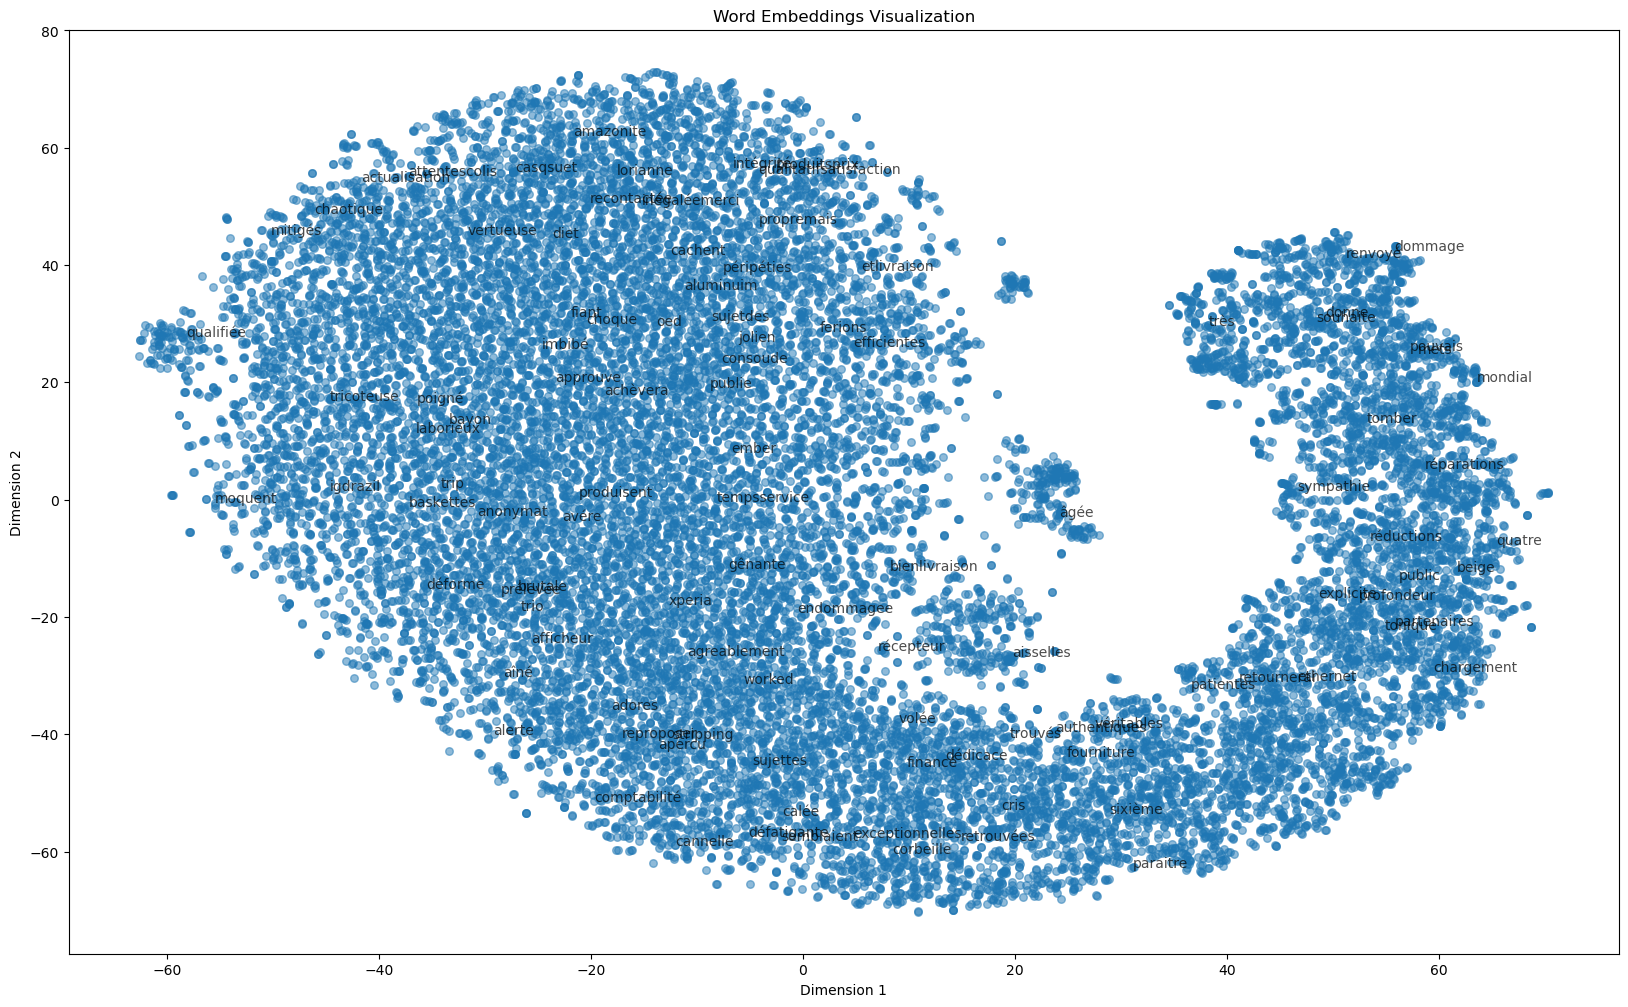

In [48]:
import nltk
from sklearn.manifold import TSNE


vocab = list(word2vec_model.wv.index_to_key)
vectors = np.array([word2vec_model.wv[word] for word in vocab])
vectors_2d = TSNE(n_components=2).fit_transform(vectors)

# Création du scatter plot
plt.figure(figsize=(20, 12))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', s=30, alpha=0.5)
for i, (word, (x, y)) in enumerate(zip(vocab, vectors_2d)):
    if i % 200 == 0:
        plt.annotate(word, (x, y), alpha=0.7)

plt.title("Word Embeddings Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


### Implementation of Euclidean or cosine distance

La distance euclidienne permet de connaitre la distance qui sépare deux points, et donc leur degré de similarité lorsque les deux points sont deux mots dans un modèle word2vec. La distance cosinus mesure l'angle entre les deux vecteurs. 

In [49]:
from scipy.spatial.distance import euclidean, cosine

distance_cosine = cosine(word2vec_model.wv['suivi'], word2vec_model.wv['prix'])
distance_euclidean = euclidean(word2vec_model.wv['satisfait'], word2vec_model.wv['livraison'])
print(f'Cosine Distance: {distance_cosine}, Euclidean Distance: {distance_euclidean}')

Cosine Distance: 0.6490413248538971, Euclidean Distance: 8.73312759399414


### Semantic search

In [50]:
def semantic_search(query, model, topn=5): #fonction qui permet de trouver les n mots les plus proches du mot en entrée
    query_vector = model.wv[query]
    similar_words = model.wv.similar_by_vector(query_vector, topn=topn)
    return similar_words

query = 'livraison'
similar_words_semantic_search = semantic_search(query, word2vec_model)
print(similar_words_semantic_search)

[('livraison', 1.0), ('expédition', 0.9366679191589355), ('envoie', 0.8493881225585938), ('indiqués', 0.8442659378051758), ('respecté', 0.8425899147987366)]


## Supervised Learning

In [51]:
df_subset.head()

,name,types,shop,score,review,review_date,experience_date,gender,shop_score_mean,year,review_tokens,Liked,reviews_checked,Translation
0,thierry,Bijouterie,www.i-diamants.com,5,"Déjà plus de 8 ans que j'ai fait mon premier achat en ligne sur I-Diamant, M. De Hantsetters et toujours aussi disponible pour les conseils et choix. Des bijoux toujours de qualités, le professionnalisme, la livraison le délai sont de mise.Je vous recommande I-Diamant.",2021-08-05 15:28:32+00:00,2021-08-05,M,4.970650,2021,"[déjà, plus, an, fait, premier, achat, ligne, diamant, hantsetters, toujours, aussi, disponible, conseils, choix, bijou, toujours, qualités, professionnalisme, livraison, délai, mise, recommande, diamant]",1,"Déjà plus de 8 ans que je ai fait mon premier achat en ligne sur a diamant , a . De et toujours aussi disponible pour les conseils et choix . Des bijoux toujours de qualités , le professionnalisme , la livraison le délai sont de mise . Je vous recommande a diamant .","Already more than 8 years that I made my first online purchase on I-Diamant, M. de Hantsetters and still also available for advice and choices.Jewelry always of qualities, professionalism, delivery the deadline are in order. I recommend that I-Diamant."
1,samuel,Cosmétique,blissim.fr,5,"Entreprise sérieuse.Ma première livraison n'est jamais arrivée car on m'a volé des colis dans la boite aux lettres. Sur 3 entreprises concernées seule Blissim a accepté de renvoyer la commande, c'est très appréciable.Je recommande vivement Blissim.Merci encore.",2023-12-07 17:45:33+00:00,2023-12-01,M,4.359375,2023,"[entreprise, sérieuse, première, livraison, jamais, arrivée, car, volé, colis, boite, lettres, entreprises, concernées, seule, blissim, accepté, renvoyer, commande, très, appréciable, recommande, vivement, blissim, merci, encore]",1,"Entreprise sérieuse . Ma première livraison un est jamais arrivée car on a la volé des colis dans la boite aux lettres . Sur 3 entreprises concernées seule a accepté de renvoyer la commande , a est très appréciable . Je recommande vivement . Merci encore .","Serious business. First delivery has never arrived because I was stolen from parcels in the mailbox.On 3 companies concerned alone Blissim agreed to return the order, it is very appreciable. I highly recommend Blissim. Thank you again."
2,cla,Bijouterie,illustresbidules.com,5,Très satisfaite de ma commande. Les bracelets sont très beaux et l'envoi très rapide.,2021-03-04 13:00:47+00:00,2021-03-04,NaN,4.949552,2021,"[très, satisfaite, commande, bracelet, très, beau, envoi, très, rapide]",1,Très satisfaite de ma commande . Les bracelets sont très beaux et l renvoi très rapide .,Very satisfied with my order.The bracelets are very beautiful and the shipment very fast.
3,annie,Cosmétique,olala-cosmetics.com,5,"Très bons produits Belle qualité, efficacité Et super packaging!Merci..et bravo !",2022-09-08 12:16:53+00:00,2022-08-01,F,4.882540,2022,"[très, bons, produits, belle, qualité, efficacité, super, packaging, merci, bravo]",1,"Très bons produits Belle qualité , efficacité Et super ! bravo !","Very good products nice quality, efficiency and great packaging! Thank you ... well done!"
4,miognaguiandreagmail.com,Électronique,www.aboutbatteries.com,1,Je n’ai absolument rien reçu,2023-11-13 12:13:47+00:00,2023-10-27,NaN,4.778357,2023,"[absolument, rien, reçu]",0,Je un ai absolument rien reçu,I haven't received anything


In [52]:
df_subset['Liked'] = df_subset['score'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
df_subset.head()

,name,types,shop,score,review,review_date,experience_date,gender,shop_score_mean,year,review_tokens,Liked,reviews_checked,Translation
0,thierry,Bijouterie,www.i-diamants.com,5,"Déjà plus de 8 ans que j'ai fait mon premier achat en ligne sur I-Diamant, M. De Hantsetters et toujours aussi disponible pour les conseils et choix. Des bijoux toujours de qualités, le professionnalisme, la livraison le délai sont de mise.Je vous recommande I-Diamant.",2021-08-05 15:28:32+00:00,2021-08-05,M,4.970650,2021,"[déjà, plus, an, fait, premier, achat, ligne, diamant, hantsetters, toujours, aussi, disponible, conseils, choix, bijou, toujours, qualités, professionnalisme, livraison, délai, mise, recommande, diamant]",1,"Déjà plus de 8 ans que je ai fait mon premier achat en ligne sur a diamant , a . De et toujours aussi disponible pour les conseils et choix . Des bijoux toujours de qualités , le professionnalisme , la livraison le délai sont de mise . Je vous recommande a diamant .","Already more than 8 years that I made my first online purchase on I-Diamant, M. de Hantsetters and still also available for advice and choices.Jewelry always of qualities, professionalism, delivery the deadline are in order. I recommend that I-Diamant."
1,samuel,Cosmétique,blissim.fr,5,"Entreprise sérieuse.Ma première livraison n'est jamais arrivée car on m'a volé des colis dans la boite aux lettres. Sur 3 entreprises concernées seule Blissim a accepté de renvoyer la commande, c'est très appréciable.Je recommande vivement Blissim.Merci encore.",2023-12-07 17:45:33+00:00,2023-12-01,M,4.359375,2023,"[entreprise, sérieuse, première, livraison, jamais, arrivée, car, volé, colis, boite, lettres, entreprises, concernées, seule, blissim, accepté, renvoyer, commande, très, appréciable, recommande, vivement, blissim, merci, encore]",1,"Entreprise sérieuse . Ma première livraison un est jamais arrivée car on a la volé des colis dans la boite aux lettres . Sur 3 entreprises concernées seule a accepté de renvoyer la commande , a est très appréciable . Je recommande vivement . Merci encore .","Serious business. First delivery has never arrived because I was stolen from parcels in the mailbox.On 3 companies concerned alone Blissim agreed to return the order, it is very appreciable. I highly recommend Blissim. Thank you again."
2,cla,Bijouterie,illustresbidules.com,5,Très satisfaite de ma commande. Les bracelets sont très beaux et l'envoi très rapide.,2021-03-04 13:00:47+00:00,2021-03-04,NaN,4.949552,2021,"[très, satisfaite, commande, bracelet, très, beau, envoi, très, rapide]",1,Très satisfaite de ma commande . Les bracelets sont très beaux et l renvoi très rapide .,Very satisfied with my order.The bracelets are very beautiful and the shipment very fast.
3,annie,Cosmétique,olala-cosmetics.com,5,"Très bons produits Belle qualité, efficacité Et super packaging!Merci..et bravo !",2022-09-08 12:16:53+00:00,2022-08-01,F,4.882540,2022,"[très, bons, produits, belle, qualité, efficacité, super, packaging, merci, bravo]",1,"Très bons produits Belle qualité , efficacité Et super ! bravo !","Very good products nice quality, efficiency and great packaging! Thank you ... well done!"
4,miognaguiandreagmail.com,Électronique,www.aboutbatteries.com,1,Je n’ai absolument rien reçu,2023-11-13 12:13:47+00:00,2023-10-27,NaN,4.778357,2023,"[absolument, rien, reçu]",0,Je un ai absolument rien reçu,I haven't received anything


## Premier modèle : prédiction du liked/notliked - classification binaire

Ici nous allons essayer de prédire à partir des avis si l'expérience a été bonne (3,4 ou 5 étoiles) ou si elle a été mauvaise (1 ou 2 étoiles)

Premier modèle avec TF-IDF et randomForest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_subset['review'], df_subset['Liked'], test_size=0.2, random_state=42)

# Vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Création du modèle et évaluation
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X_train_tfidf, y_train)
y_pred = rf_model1.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.859375
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       164
           1       0.87      0.83      0.85       156

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320

[[145  19]
 [ 26 130]]


In [67]:
input_text = "livraison rapide et produits de qualité. Très satisfait !"
input_tfidf = tfidf_vectorizer.transform([input_text])
prediction = rf_model1.predict(input_tfidf)[0]
print(f"Prediction for '{input_text}': Liked={prediction}")

Prediction for 'livraison rapide et produits de qualité. Très satisfait !': Liked=1


In [79]:
input_text = "J'ai jamais vu ça de toute mon existence comment c'est nul. N'utilisez surtout pas cette boutique! Allez ailleurs par pitié"
input_tfidf = tfidf_vectorizer.transform([input_text])
prediction = rf_model1.predict(input_tfidf)[0]
print(f"Prediction for '{input_text}': Liked={prediction}")

Prediction for 'J'ai jamais vu ça de toute mon existence comment c'est nul. N'utilisez surtout pas cette boutique! Allez ailleurs par pitié': Liked=0


Second modèle de deep-learning sans embedding layer pré-entrainée

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X_train2, X_test2, y_train2, y_test2 = train_test_split(df_subset['review'], df_subset['Liked'], test_size=0.2, random_state=42)

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(X_train2)
X_train_sequences = tokenizer2.texts_to_sequences(X_train2)
X_test_sequences = tokenizer2.texts_to_sequences(X_test2)
X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post')

embedding_dim = 100

model2 = Sequential([
    Embedding(input_dim=len(tokenizer2.word_index) + 1,
              output_dim=embedding_dim,
              input_length=50),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1)
model2.fit(X_train_padded, y_train2, epochs=5, validation_data=(X_test_padded, y_test2))

test_loss, test_accuracy = model2.evaluate(X_test_padded, y_test2)
print(f"Test Accuracy: {test_accuracy}")

y_pred2 = (model2.predict(X_test_padded) > 0.5).astype("int32")
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))


Epoch 1/5
40/40 [==============================] - 1s 12ms/step - loss: 0.6428 - accuracy: 0.6492 - val_loss: 0.6014 - val_accuracy: 0.6781
Epoch 2/5
40/40 [==============================] - 0s 7ms/step - loss: 0.4809 - accuracy: 0.7656 - val_loss: 0.4477 - val_accuracy: 0.8125
Epoch 3/5
40/40 [==============================] - 0s 7ms/step - loss: 0.2184 - accuracy: 0.9352 - val_loss: 0.3433 - val_accuracy: 0.8500
Epoch 4/5
40/40 [==============================] - 0s 7ms/step - loss: 0.0825 - accuracy: 0.9820 - val_loss: 0.3108 - val_accuracy: 0.8656
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.3228 - accuracy: 0.8625
Test Accuracy: 0.862500011920929
10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       164
           1       0.86      0.85      0.86       156

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.8

In [55]:
#Installez l'extension tensorflow sur vscode pour avoir une visualisation du modèle
%reload_ext tensorboard
%tensorboard --logdir=logs

Reusing TensorBoard on port 6006 (pid 71144), started 23:28:40 ago. (Use '!kill 71144' to kill it.)

Troisième modèle de deep learning avec embedding layer pré-entrainée avec word2vec

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_subset['review'], df_subset['Liked'], test_size=0.2, random_state=42)

tokenizer3 = Tokenizer()
tokenizer3.fit_on_texts(X_train3)
X_train_sequences = tokenizer3.texts_to_sequences(X_train3)
X_test_sequences = tokenizer3.texts_to_sequences(X_test3)
X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post')

embedding_dim = 100

def create_embedding_matrix(model, word_index, embedding_dim):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        if word in model.wv:
            embedding_matrix[i] = model.wv[word]
    return embedding_matrix


embedding_matrix = create_embedding_matrix(word2vec_model, tokenizer3.word_index, embedding_dim)

model3 = Sequential([
    Embedding(input_dim=len(tokenizer3.word_index) + 1,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=50,
              trainable=False),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs", histogram_freq=1)
model3.fit(X_train_padded, y_train3, epochs=5, validation_data=(X_test_padded, y_test3))
test_loss, test_accuracy = model3.evaluate(X_test_padded, y_test3)
y_pred3 = (model3.predict(X_test_padded) > 0.5).astype("int32")
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))



Epoch 1/5
40/40 [==============================] - 1s 8ms/step - loss: 0.5041 - accuracy: 0.7523 - val_loss: 0.3868 - val_accuracy: 0.8562
Epoch 2/5
40/40 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8844 - val_loss: 0.3882 - val_accuracy: 0.8562
Epoch 3/5
40/40 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.9125 - val_loss: 0.3959 - val_accuracy: 0.8656
Epoch 4/5
40/40 [==============================] - 0s 5ms/step - loss: 0.1897 - accuracy: 0.9336 - val_loss: 0.3900 - val_accuracy: 0.8375
Epoch 5/5
10/10 [==============================] - 0s 1ms/step
Test Accuracy: 0.8687499761581421
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       164
           1       0.88      0.85      0.86       156

    accuracy                           0.87       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.87      0.87       320

[[145  19]
 [ 23 133

In [84]:
input_text = "livraison rapide et produits de qualité. Très satisfait !"
input_sequence = tokenizer3.texts_to_sequences([input_text])
input_padded = pad_sequences(input_sequence, maxlen=50, padding='post')
prediction = model3.predict(input_padded)[0][0]
liked = 1 if prediction > 0.5 else 0
print(f"Prediction for '{input_text}': Liked={liked}")

1/1 [==============================] - 0s 22ms/step


Prediction for 'livraison rapide et produits de qualité. Très satisfait !': Liked=1


In [81]:
input_text = "J'ai jamais vu ça de toute mon existence comment c'est nul. N'utilisez surtout pas cette boutique! Allez ailleurs par pitié"
input_sequence = tokenizer3.texts_to_sequences([input_text])
input_padded = pad_sequences(input_sequence, maxlen=50, padding='post')
prediction = model3.predict(input_padded)[0][0]
liked = 1 if prediction > 0.5 else 0
print("Liked={liked}")

1/1 [==============================] - 0s 23ms/step
Prediction for 'J'ai jamais vu ça de toute mon existence comment c'est nul. N'utilisez surtout pas cette boutique! Allez ailleurs par pitié': Liked=0


In [87]:
import pickle

with open('tokenizer3.pkl', 'wb') as file:
    pickle.dump(tokenizer3, file)

model3.save('model3.h5')


c:\Users\loick\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
%reload_ext tensorboard
%tensorboard --logdir=logs

Reusing TensorBoard on port 6006 (pid 71144), started 23:28:42 ago. (Use '!kill 71144' to kill it.)

Quatrième modèle avec BERT

In [58]:
from transformers import BertTokenizer, BertModel

tokenizer4 = BertTokenizer.from_pretrained('bert-base-uncased')
model4 = BertModel.from_pretrained('bert-base-uncased')

X_train4, X_test4, y_train4, y_test4 = train_test_split(df_subset['review'], df_subset['Liked'], test_size=0.2, random_state=42)

X_train_encoded = [tokenizer4(text, return_tensors='pt')['input_ids'] for text in X_train4]
X_test_encoded = [tokenizer4(text, return_tensors='pt')['input_ids'] for text in X_test4]
X_train_embeddings = [model4(input_ids)[0][:, 0, :].detach().numpy() for input_ids in X_train_encoded]
X_test_embeddings = [model4(input_ids)[0][:, 0, :].detach().numpy() for input_ids in X_test_encoded]
X_train_flatten = [embedding.flatten() for embedding in X_train_embeddings]
X_test_flatten = [embedding.flatten() for embedding in X_test_embeddings]
X_train_array = np.array(X_train_flatten)
X_test_array = np.array(X_test_flatten)


rf_model4 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model4.fit(X_train_array, y_train3)
y_pred4 = rf_model4.predict(X_test_array)

accuracy = accuracy_score(y_test3, y_pred4)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))


Accuracy: 0.78125
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       164
           1       0.78      0.78      0.78       156

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

[[129  35]
 [ 35 121]]


In [64]:
review1 = "livraison rapide et produits de qualité. Très satisfait !"
encoded_review = tokenizer4(review1, return_tensors='pt')['input_ids']
embedding = model4(encoded_review)[0][:, 0, :].detach().numpy()
flatten_embedding = embedding.flatten()
input_array = np.array([flatten_embedding])
prediction = rf_model4.predict(input_array)
print(f"Prediction: {prediction}")

Prediction: [1]


In [78]:
review2 = "J'ai jamais vu ça de toute mon existence comment c'est nul. N'utilisez surtout pas cette boutique! Allez ailleurs par pitié"
encoded_review = tokenizer4(review2, return_tensors='pt')['input_ids']
embedding = model4(encoded_review)[0][:, 0, :].detach().numpy()
flatten_embedding = embedding.flatten()
input_array = np.array([flatten_embedding])

prediction = rf_model4.predict(input_array)
print(f"Prediction: {prediction}")

Prediction: [0]


Dernier modèle avec GPT2

In [61]:
from transformers import GPT2Tokenizer, GPT2Model

tokenizer5 = GPT2Tokenizer.from_pretrained('gpt2')
model5 = GPT2Model.from_pretrained('gpt2')

X_train5, X_test5, y_train5, y_test5 = train_test_split(df_subset['review'], df_subset['Liked'], test_size=0.2, random_state=42)

X_train_encoded = [tokenizer5(text, return_tensors='pt')['input_ids'] for text in X_train]
X_test_encoded = [tokenizer5(text, return_tensors='pt')['input_ids'] for text in X_test]
X_train_embeddings = [model5(input_ids)[0][:, 0, :].detach().numpy() for input_ids in X_train_encoded]
X_test_embeddings = [model5(input_ids)[0][:, 0, :].detach().numpy() for input_ids in X_test_encoded]
X_train_flatten = [embedding.flatten() for embedding in X_train_embeddings]
X_test_flatten = [embedding.flatten() for embedding in X_test_embeddings]
X_train_array = np.array(X_train_flatten)
X_test_array = np.array(X_test_flatten)

rf_model5 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model5.fit(X_train_array, y_train5)
y_pred5 = rf_model5.predict(X_test_array)
accuracy = accuracy_score(y_test5, y_pred5)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test5, y_pred5))
print(confusion_matrix(y_test5, y_pred5))


Accuracy: 0.684375
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       164
           1       0.70      0.62      0.66       156

    accuracy                           0.68       320
   macro avg       0.69      0.68      0.68       320
weighted avg       0.69      0.68      0.68       320

[[122  42]
 [ 59  97]]


## Result Interpretation

### Error Analysis

In [71]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

predictions = rf_model1.predict(X_test_tfidf)
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

misclassified_indices = [i for i, (true_label, predicted_label) in enumerate(zip(y_test, predicted_labels)) if true_label != predicted_label]
for index in misclassified_indices:
    print(f"True Label: {y_test.iloc[index]}, Predicted Label: {predicted_labels[index]}, Text: {X_test.iloc[index]}")

True Label: 0, Predicted Label: 1, Text: Rapidement reçu. Très joliment emballés et produits conformes aux visuels. Très contente.
True Label: 1, Predicted Label: 0, Text: Top, rapide efficace et le meilleur prix du net pour une Frame 55. J'avais un peu peur étant habitué aux grandes enseignes mais franchement pas déçu d'avoir sauté le pas!
True Label: 0, Predicted Label: 1, Text: je suis satisfaite de ma livraison rapide merci les produis parfait.
True Label: 1, Predicted Label: 0, Text: Je recommande également.J'ai failli retirer 1 étoile : une des deux BO semblait être un peu abimée sur leur photo. J'avais écrit pour obtenir confirmation et on ne m'avait pas répondu. J'ai acheté quand même (avec un autre article).Une BO était bien légèrement abimée, j'ai décidé de les garder quand même, le service client s'est excusé par la suite.Là où je mets la 5e étoile, outre la rapidité de livraison et les prix très corrects, c'est le contact très efficace et arrangeant pour le retour du 2ème a

In [72]:
len(misclassified_indices)

45

### Sentiment Detection

In [63]:
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob import Blobber
from sklearn.metrics import accuracy_score, classification_report

tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

sentiments = [tb(text).sentiment[0] for text in X_test]  # Accéder à la polarit
sentiment_labels = [1 if score >= 0 else 0 for score in sentiments]
sentiment_accuracy = accuracy_score(y_test, sentiment_labels)
print(f"Sentiment Accuracy: {sentiment_accuracy}")
print(classification_report(y_test, sentiment_labels))

Sentiment Accuracy: 0.671875
              precision    recall  f1-score   support

           0       0.89      0.41      0.56       164
           1       0.60      0.95      0.74       156

    accuracy                           0.67       320
   macro avg       0.75      0.68      0.65       320
weighted avg       0.75      0.67      0.65       320



## Streamlit